In [1]:
#Import Lıbraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#Load Data
data=pd.read_csv("C:\\Users\\busra\\OneDrive\\Masaüstü\\data.csv")

In [3]:
#Print first 5 rows and columns
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Data's type
type(data)

pandas.core.frame.DataFrame

In [5]:
#Number of rows and columns
data.shape

(614, 13)

In [6]:
#Numeric information about the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Some information obout the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Number of missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Drop the missing values
data=data.dropna()

In [10]:
#Check number of missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Visualization

<AxesSubplot: xlabel='Education', ylabel='count'>

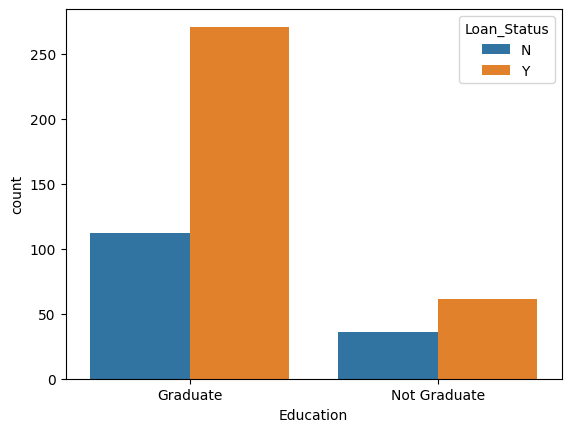

In [11]:
#Education and Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot: xlabel='Married', ylabel='count'>

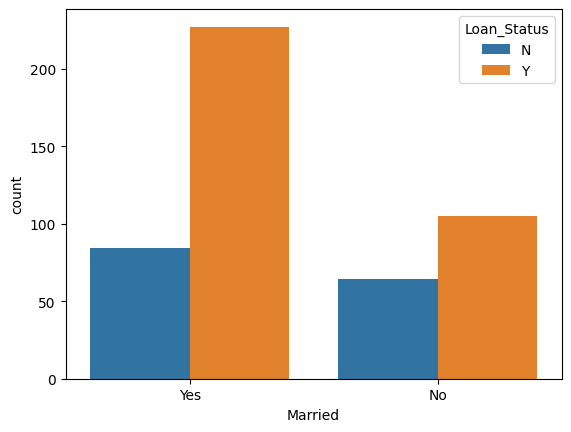

In [12]:
#Maritial Status and Loan State Column
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [13]:
#Label Encoding in Loan Status column
data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [14]:
data["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [15]:
#Label Encoding in Education column
data.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)

In [16]:
data["Married"].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [17]:
#Label Encoding in Married column
data.replace({"Married":{"Yes":1,"No":0}},inplace=True)

In [18]:
data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [19]:
#Fix 3+
data.replace({"Dependents":{"0":0,"1":1,"2":2,"3+":4}},inplace=True)

In [20]:
data["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [21]:
#Label Encoding in Gender column
data.replace({"Gender":{"Male":1,"Female":0}},inplace=True)

In [22]:
data["Self_Employed"].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [23]:
#Label Encoding in Self_employed column
data.replace({"Self_Employed":{"Yes":1,"No":0}},inplace=True)

In [24]:
data["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [25]:
#Label Encoding in Property_Area column
data.replace({"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 52.5+ KB


In [27]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [28]:
#Seperate data features and targets
x=data.drop(columns=["Loan_ID","Loan_Status"],axis=1)
y=data["Loan_Status"]

In [29]:
print(x)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [30]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [31]:
#Seperate data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


Support Vector Machine Model

In [33]:
model=svm.SVC(kernel="linear")

In [35]:
#Fit the model
model.fit(x_train,y_train)

SVC(kernel='linear')

Model Evulation

In [37]:
#Accuracy on Train data
train_predict=model.predict(x_train)
train_score=accuracy_score(train_predict,y_train)

In [38]:
print("Accuracy score on the train data : ",train_score)

Accuracy score on the train data :  0.7986111111111112


In [39]:
#Accuracy on Test Data
test_predict=model.predict(x_test)
test_score=accuracy_score(test_predict,y_test)

In [40]:
print("Accuracy score on the test data : ",test_score)

Accuracy score on the test data :  0.8333333333333334
